# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### 2. Lee una imagen
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [2]:
image = plt.imread('data/foto_clase.png')
image.shape

(752, 1516, 4)

In [10]:
image = image[:,:,:3].copy()
image.shape

(752, 1516, 3)

In [12]:
image.size

3420096

In [13]:
752*1516*3

3420096

In [16]:
image[0][0]

array([0.60784316, 0.63529414, 0.67058825], dtype=float32)

Muestra la imagen para ver que se ha cargado bien

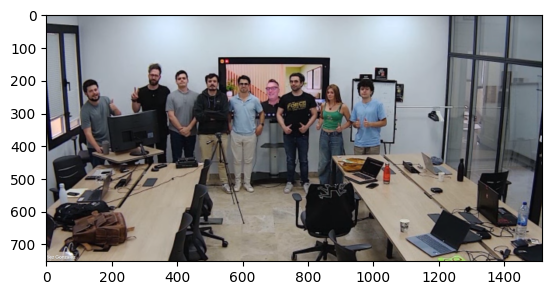

In [17]:
plt.imshow(image)

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [19]:
X = image.reshape(-1,3)
X.shape

(1140032, 3)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [38]:
k = 5

kmeans = KMeans(n_clusters=k, n_init=10, random_state=10).fit(X)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizlos para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [39]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [40]:
kmeans.cluster_centers_

array([[0.65899   , 0.6401581 , 0.62182975],
       [0.09567404, 0.08915141, 0.10110882],
       [0.3177999 , 0.29651272, 0.29432568],
       [0.48768693, 0.4826321 , 0.48680174],
       [0.7778205 , 0.8242146 , 0.8646794 ]], dtype=float32)

In [41]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [42]:
segmented_img = segmented_img.reshape(image.shape)

#### 7. Imprime y guarda en tu ordenador la imagen resultante

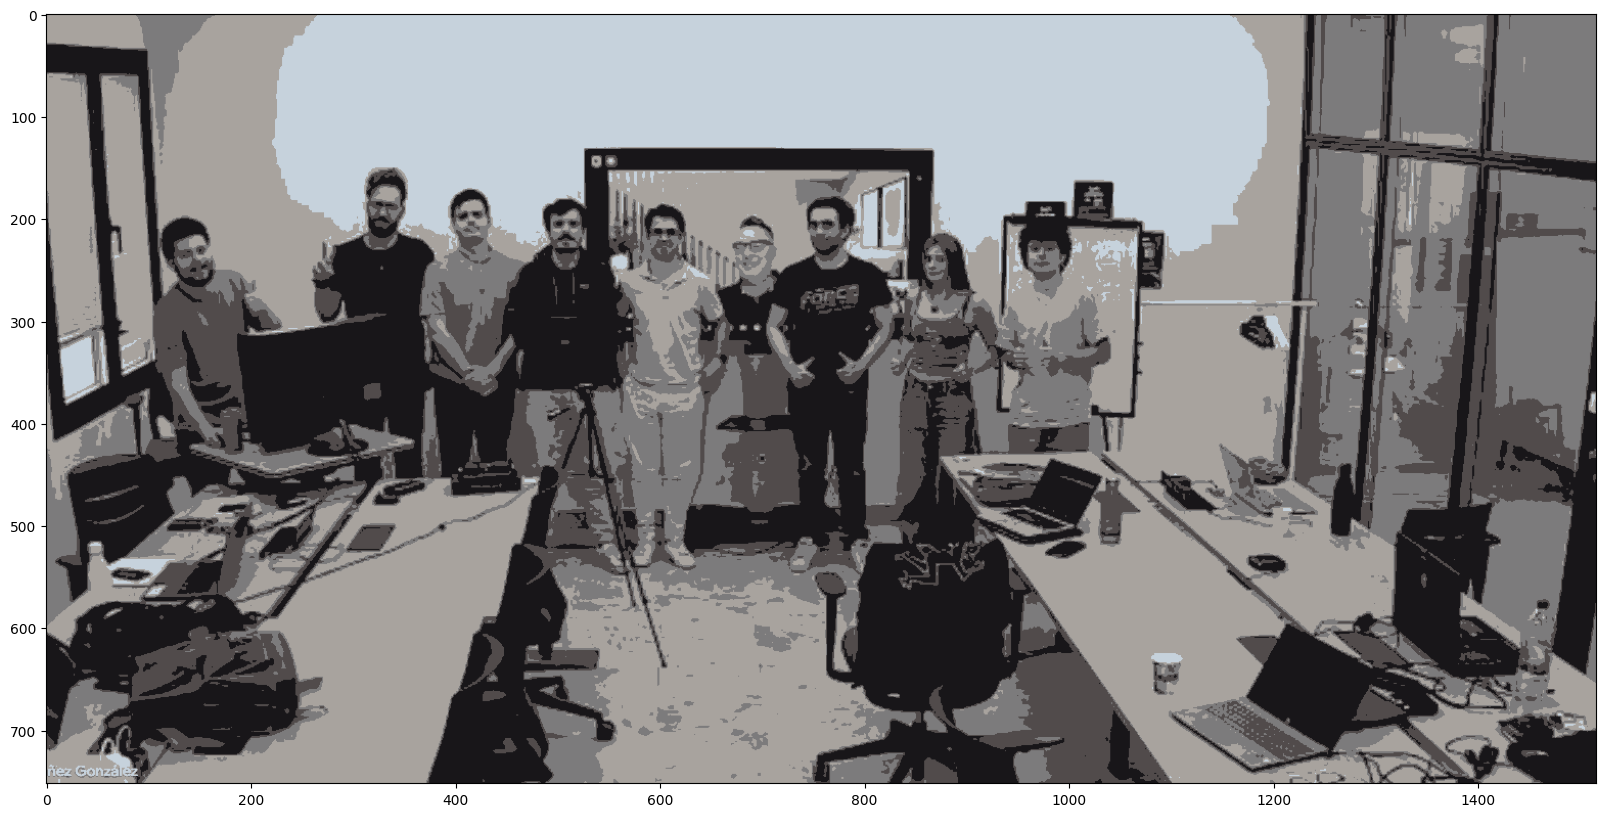

In [43]:
fig = plt.figure(figsize=(20,15))
plt.imshow(segmented_img)

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [48]:
def cluster_colors(image, n_colores, save=False):
    image = plt.imread(image)
    image = image[:,:,:3].copy()
    X = image.reshape(-1,3)
    kmeans = KMeans(n_clusters=n_colores).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    fig = plt.figure(figsize=(15,20))
    plt.imshow(segmented_img.reshape(image.shape))

    if save:
        fig.savefig("mi_imagen.png")

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


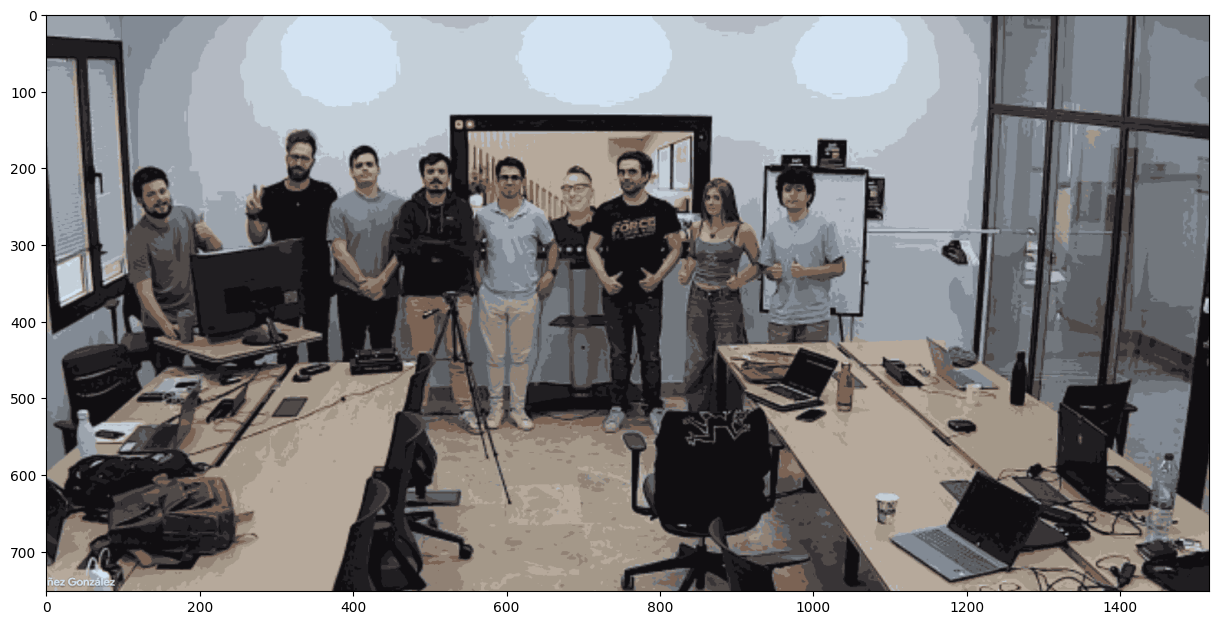

In [49]:
cluster_colors('data/foto_clase.png',15)